In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Read the data set

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [3]:
data 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that there are many NaN values.let's treat them.

In [14]:
data.tail(100)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df=data.dropna(how='all')

In [33]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [37]:
df.drop(columns=['Unnamed: 0','Date'],axis=1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [38]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [23]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


It seems that there are no missing valuses in our data.let's see the distribution of data :

In [25]:
df.shape

(1517, 14)

In [51]:
df_1=df.drop(columns=['Unnamed: 0','Date','year','type','region'],axis=1)

In [52]:
df_1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [54]:
df_1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


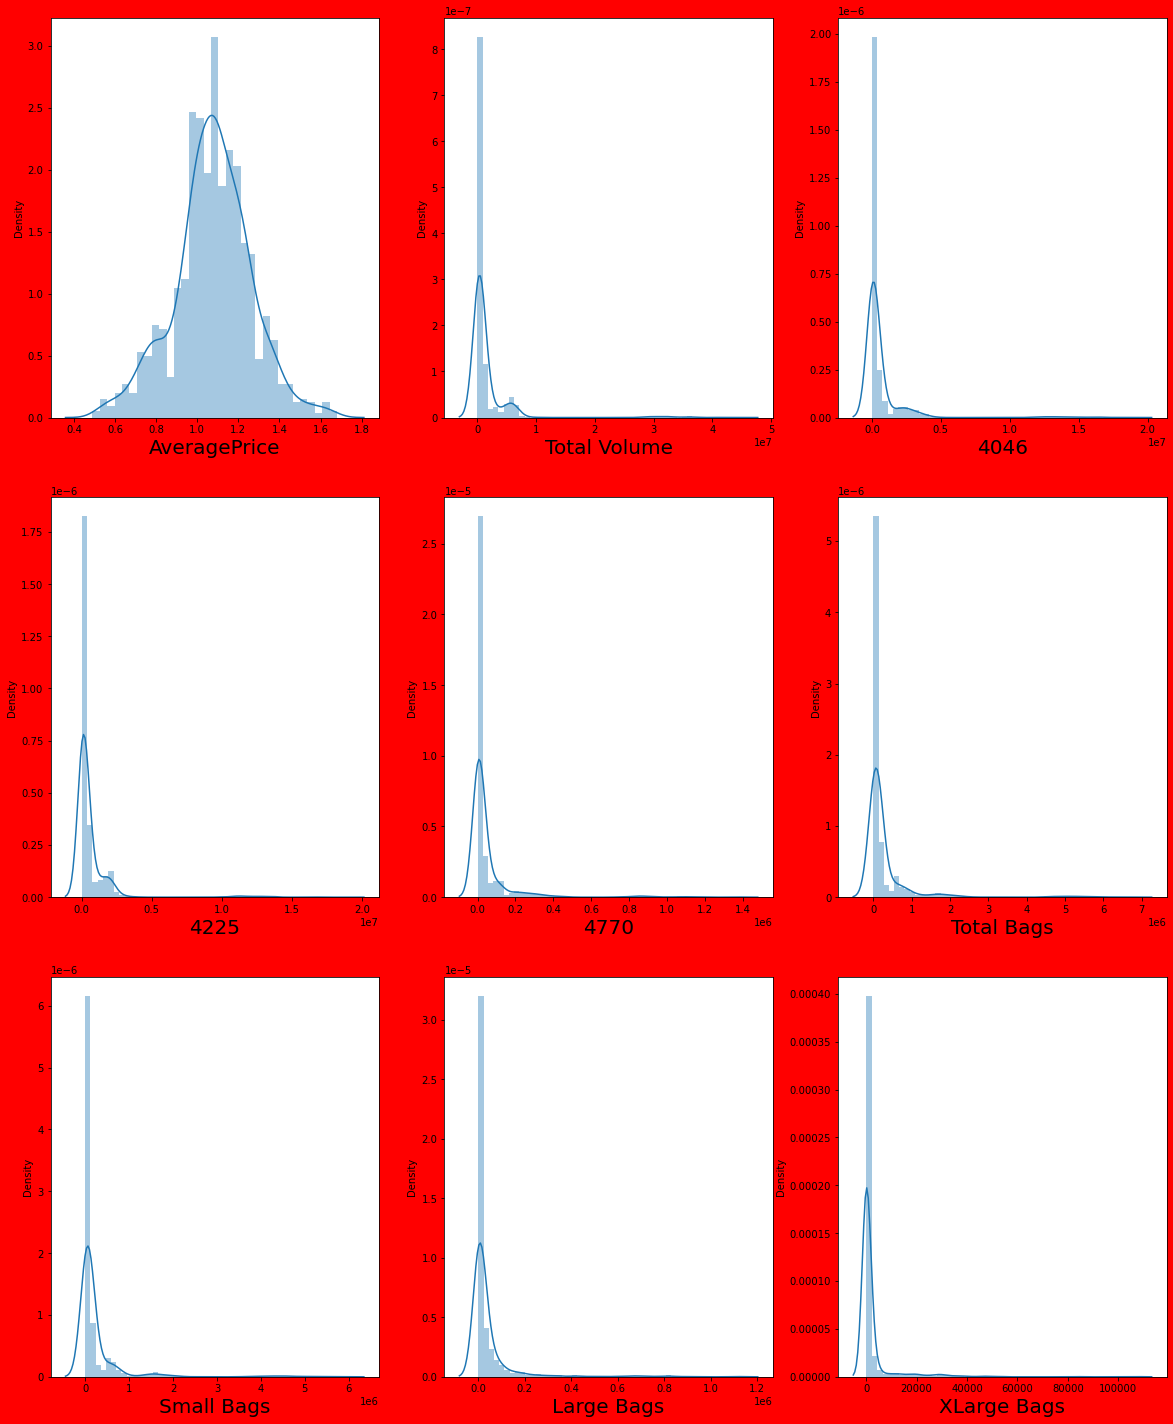

In [56]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in df_1:
    if plotnumber<=9 :  # as there are 17 columns in the data
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()      

The data distribution looks decent enough and there  seems to skewness and outliers.Great let's go ahead. let's observe the relationship between independent variables and dependent variable.

In [61]:
df_1['AveragePrice']=df_1['AveragePrice'].replace(df_1['AveragePrice'].mean())
df_1['Total Volume']=df_1['Total Volume'].replace(df_1['Total Volume'].mean())
df_1['4046']=df_1['4046'].replace(df_1['4046'].mean())
df_1['4225']=df_1['4225'].replace(df_1['4225'].mean())
df_1['4770']=df_1['4770'].replace(df_1['4770'].mean())
df_1['Total Bags']=df_1['Total Bags'].replace(df_1['Total Bags'].mean())
df_1['Small Bags']=df_1['Small Bags'].replace(df_1['Small Bags'].mean())
df_1['Large Bags']=df_1['Large Bags'].replace(df_1['Large Bags'].mean())
df_1['XLarge Bags']=df_1['XLarge Bags'].replace(0.0,df_1['XLarge Bags'].mean())


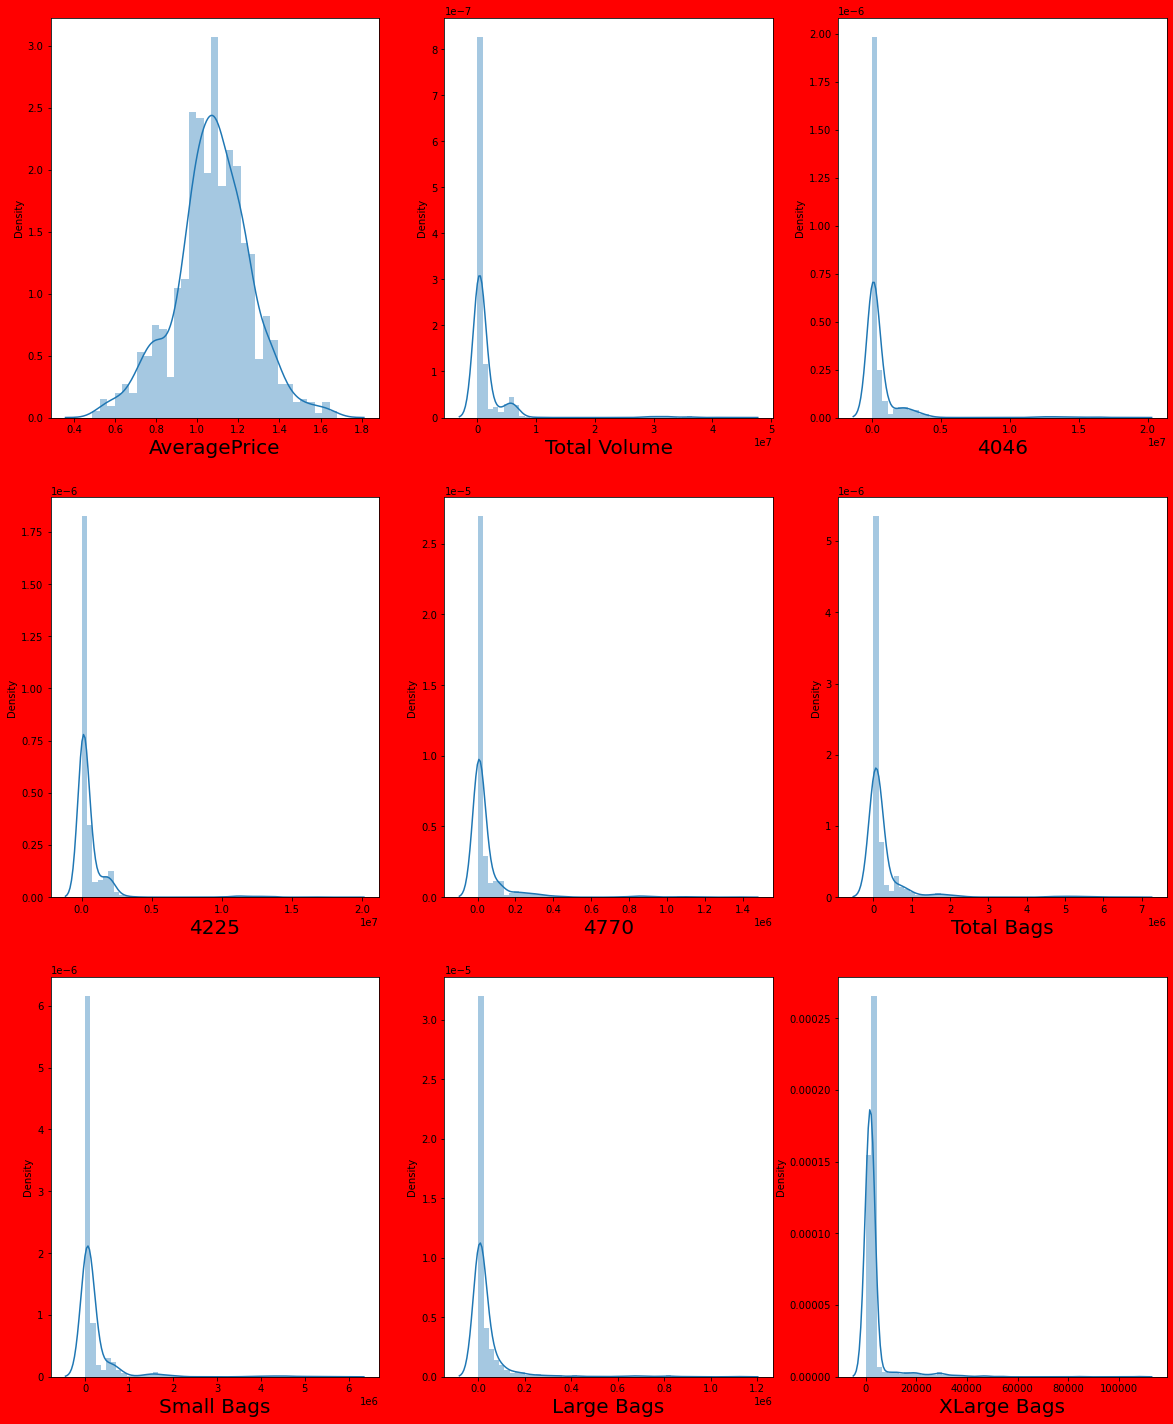

In [62]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in df_1:
    if plotnumber<=9 :  # as there are 17 columns in the data
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()   

In [65]:
# Divide data set into features and label
y=df_1['AveragePrice']
x=df_1.drop(columns=['AveragePrice'])

In [66]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [67]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2181.771074
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2181.771074
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2181.771074
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2181.771074
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2181.771074
...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2181.771074
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2181.771074


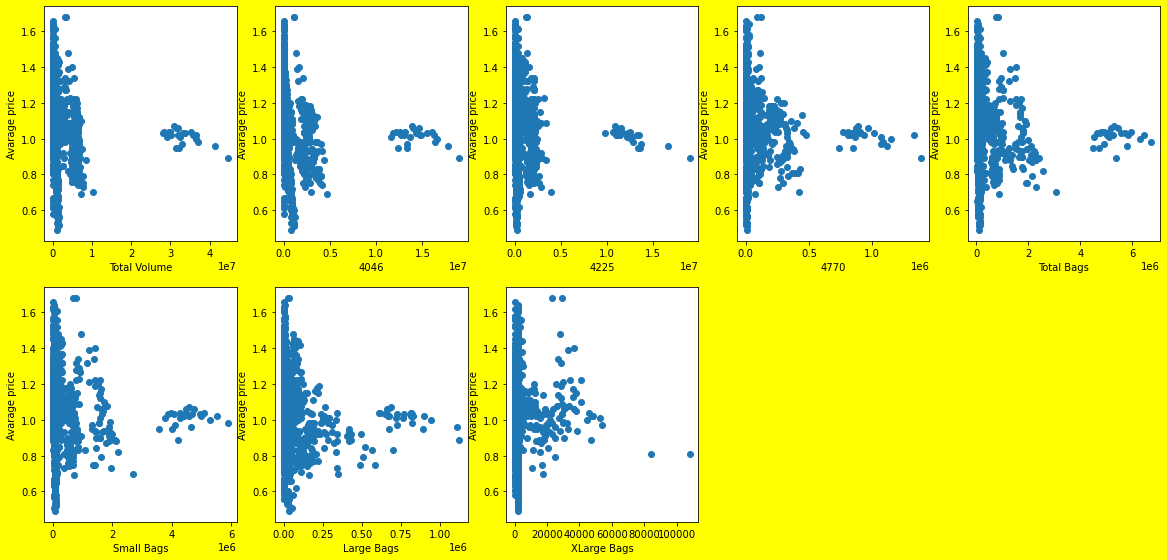

In [68]:
# Visualizing relationship
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1


for column in x:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax= plt.subplot(5,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Avarage price',fontsize=10)
        
    plotnumber+=1
plt.show()

In [69]:
# Data scaling.formula Z=(x-mean)/std
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [70]:
x_scaled

array([[-0.34696593, -0.33149016, -0.33305294, ..., -0.37105465,
        -0.36004386, -0.1595718 ],
       [-0.34907791, -0.33167633, -0.33892254, ..., -0.3698118 ,
        -0.36000798, -0.1595718 ],
       [-0.33478463, -0.33161448, -0.30034767, ..., -0.37192201,
        -0.35996017, -0.1595718 ],
       ...,
       [-0.32120275, -0.30820887, -0.33398664, ..., -0.30194984,
        -0.29095317, -0.34821286],
       [-0.31878364, -0.30423037, -0.33356795, ..., -0.29836419,
        -0.29078309, -0.1595718 ],
       [-0.3201721 , -0.30987728, -0.33320927, ..., -0.29557902,
        -0.26226571, -0.1595718 ]])

In [71]:
# split data into train and test. Model will be build on training data tested on test data.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

774     0.71
657     1.22
1015    1.01
1111    0.97
883     1.20
Name: AveragePrice, dtype: float64

# Model instantiating and training

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# predict the chance of avarage price given feature

In [75]:
df_1.tail(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2181.771074
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,2181.771074


In [77]:
# since we have already fit the scaler,you can transform the data
print('chance of Avarage price is :  ',regression.predict(scaler.transform([['189131.52','54110.79','53593.58','17495.42','63931.73','55653.47','8278.26','2181.771074']])))

chance of Avarage price is :   [1.09094521]


# you can save the model and later you can use it for prediction

In [78]:
import pickle

In [79]:
# saving the model to the local file system
pickle.dump(regression,open('reg_model','wb'))

# # prediction using the saved model

In [83]:
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([['189131.52','54110.79','53593.58','17495.42','63931.73','55653.47','8278.26','2181.771074']]))
a

array([1.09094521])

In [81]:
scaler.transform([['189131.52','54110.79','53593.58','17495.42','63931.73','55653.47','8278.26','2181.771074']])

array([[-0.31878364, -0.30423037, -0.33356795, -0.2389362 , -0.30309833,
        -0.29836419, -0.29078309, -0.1595718 ]])

# Let's check how well model fits on train data

In [82]:
# Adjust R2 score
regression.score(x_train,y_train)

0.14444527510799576

#  Let's check how well model fits on test data

In [84]:
regression.score(x_test,y_test)

0.1880268689533583

# Let's plot visualize

In [85]:
y_pred=regression.predict(x_test)

In [86]:
y_pred

array([1.06456905, 1.10214783, 1.08006805, 0.88793487, 1.10262804,
       1.17179921, 1.05814154, 0.98905557, 1.136447  , 1.06817397,
       1.09084418, 1.14533542, 1.0664086 , 1.03137721, 1.13538695,
       0.97225597, 1.0941366 , 1.16924387, 1.17632829, 1.06845901,
       1.13067828, 1.08053521, 1.07920339, 1.13211602, 1.09628172,
       1.09474306, 1.07917903, 1.03771873, 1.115344  , 1.07396882,
       1.05285178, 1.09400183, 1.06272634, 1.1268969 , 1.039796  ,
       1.1334879 , 1.17679773, 1.04021517, 1.06326446, 1.07031522,
       1.09876633, 1.07583746, 1.09249815, 1.02830401, 1.15721246,
       0.99914873, 1.08071348, 1.08227018, 1.07815871, 1.00514452,
       1.09717468, 1.06915284, 1.07134998, 1.07817331, 1.13689505,
       1.09515576, 1.06719815, 1.09543807, 1.1323903 , 1.06982355,
       1.07904412, 1.09434201, 1.15222393, 1.09079892, 1.06369907,
       1.14871192, 1.11361215, 1.06865559, 1.08430882, 0.808448  ,
       1.13303743, 1.0961531 , 1.18786135, 1.06990475, 1.12101

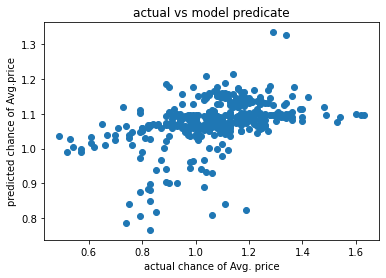

In [87]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual chance of Avg. price")
plt.ylabel("predicted chance of Avg.price")
plt.title('actual vs model predicate')
plt.show()

# Model evaluation

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [89]:
y_pred =regression.predict(x_test)

In [90]:
#MAE
mean_absolute_error(y_test,y_pred)

0.12296359024159652

In [91]:
#MSE
mean_squared_error(y_test,y_pred)

0.027218991976666905

In [92]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.16498179286414275

# you have succesfully complete building linear Regression model

# Regularization

In [93]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [94]:
lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [95]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

1.4972238510300768e-05

In [96]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.4972238510300768e-05)

In [97]:
lasso_reg.score(x_test,y_test)

0.17993662359241458

# using ridge regression model

In [98]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [99]:
ridgecv.alpha_

0.001

In [100]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [101]:
ridge_model.score(x_test,y_test)

0.18531289646247828

# Data Preprocessing (Analysis(EDA))

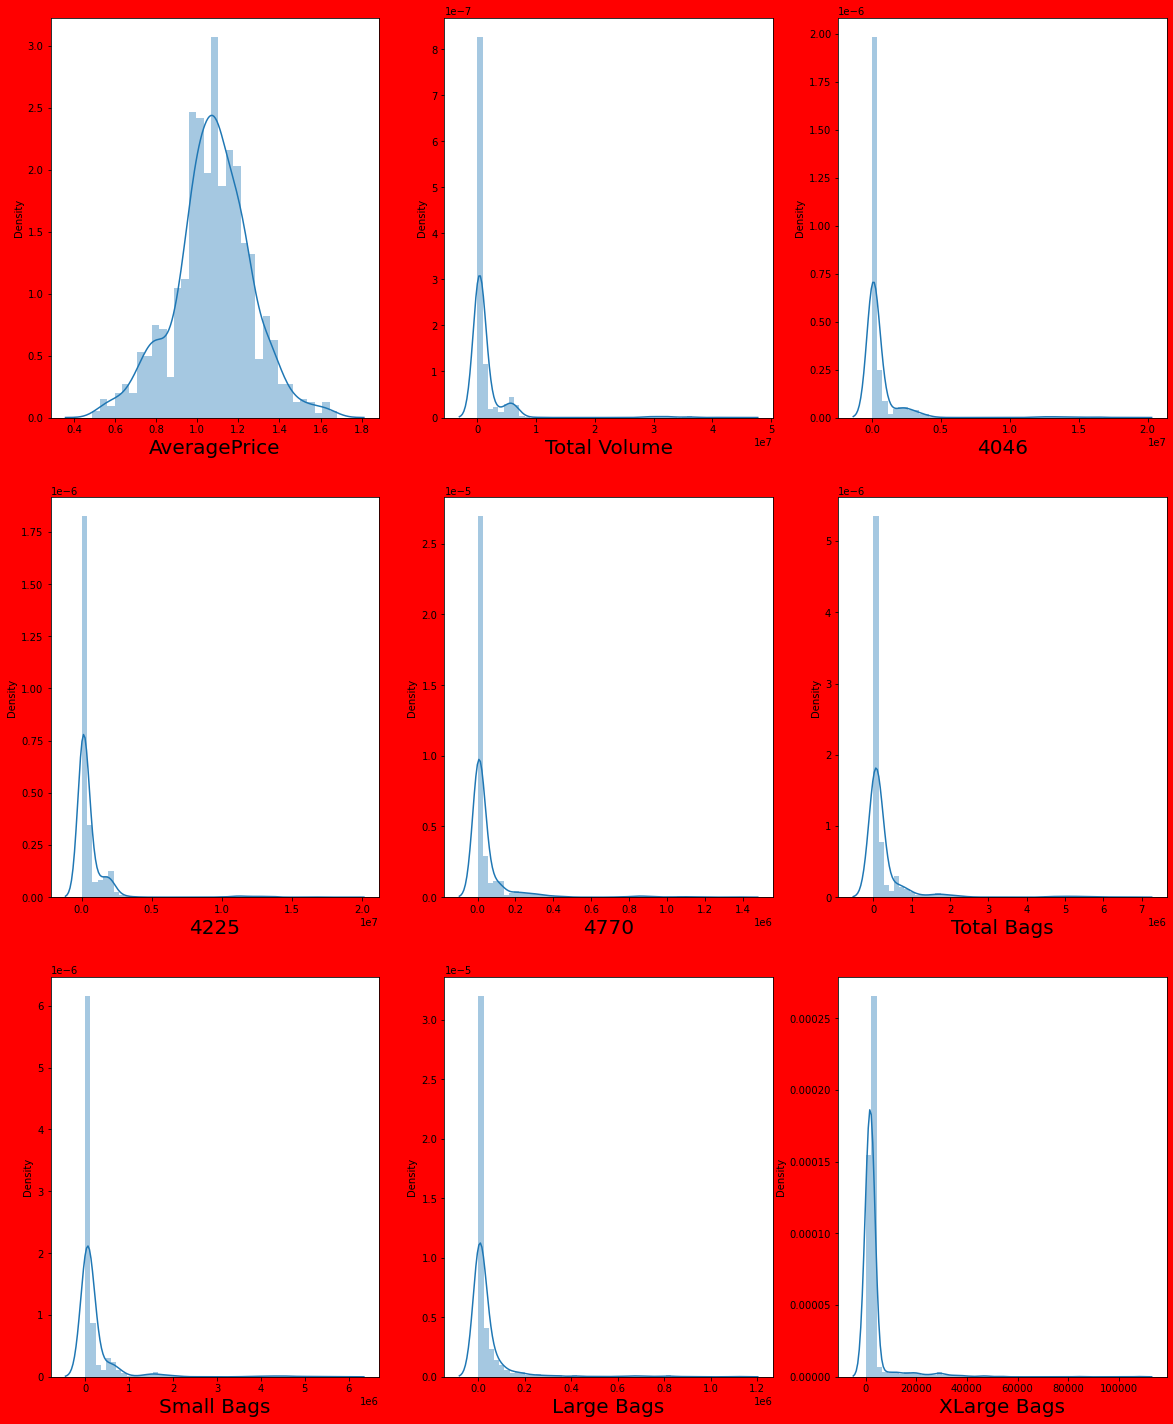

In [109]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in df_1:
    if plotnumber<=9 :  # as there are 9 It seems that there is skewness in 'R','ERA','SHO','SV','E'.columns in the data
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

In [106]:
df_features=df_1.drop('AveragePrice',axis=1)

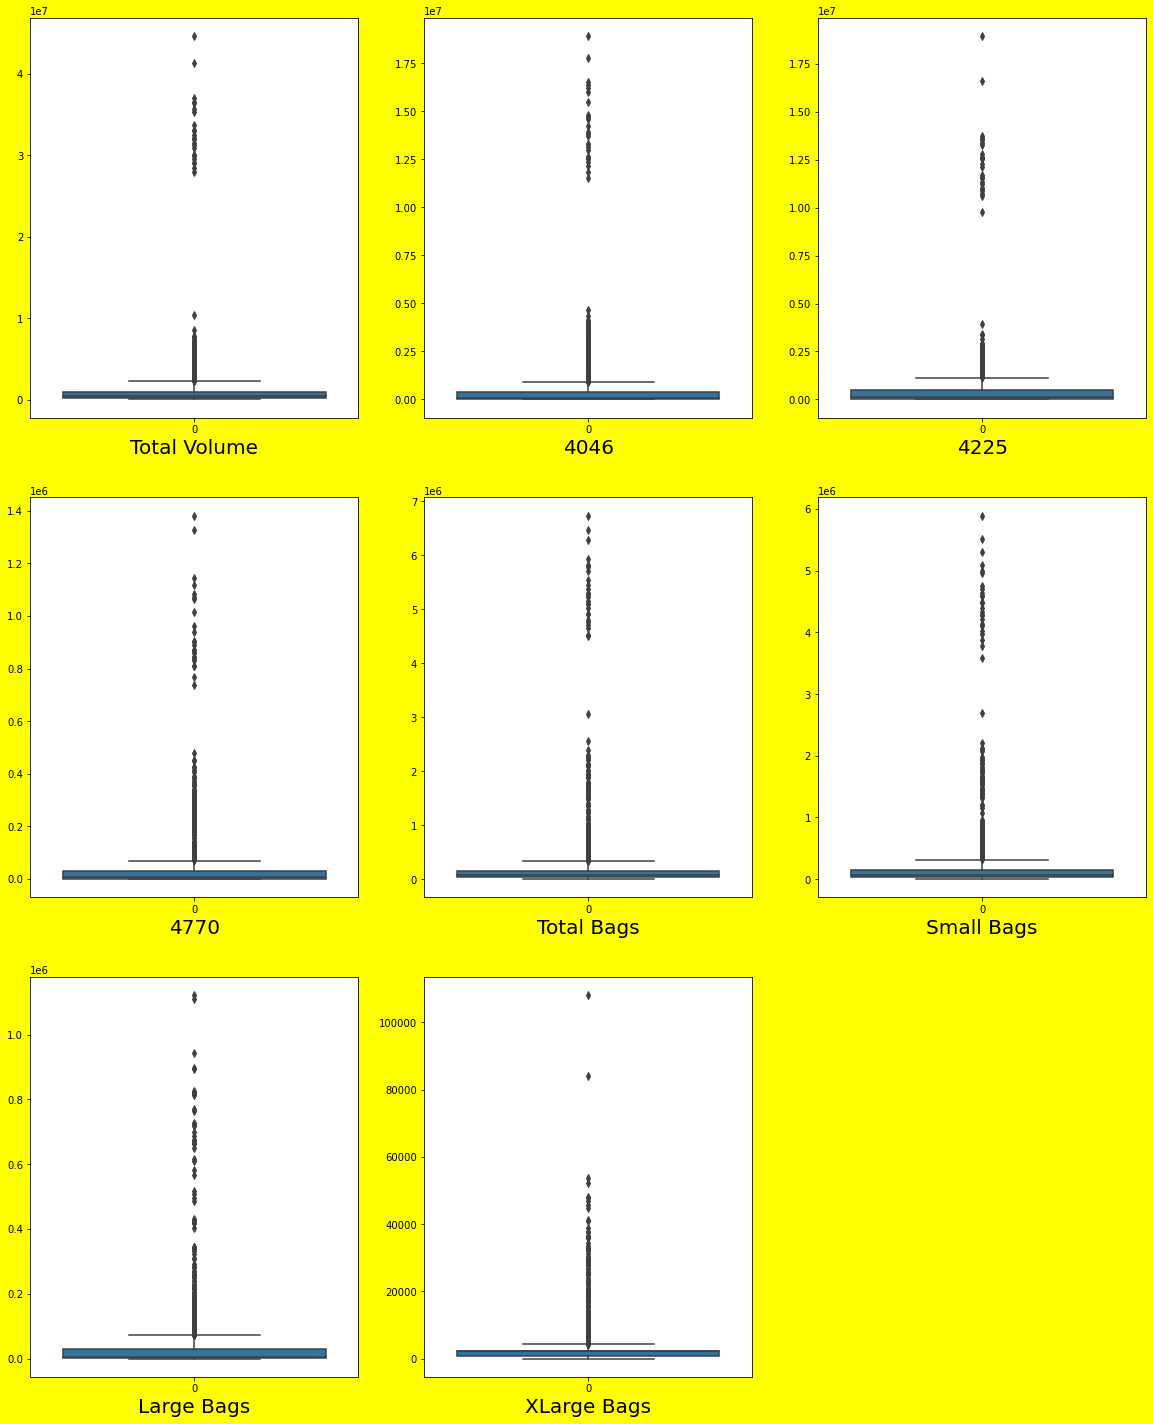

In [108]:
#Visualize the outliers using box plot
plt.figure(figsize=(20,25),facecolor='yellow')
graph = 1


for column in df_features:
    if graph<=8 :  # as there are 8 columns in the data
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
        
        
    graph+=1
plt.show()

It seems that there is skewness in 'Total volume','4046,'4225','4770','Total bags','small Bags','Large Bags','XLarge Bags'.

In [111]:
df_1.shape

(1517, 9)

# Finding relationship.Wde want to keep only those features which have relationship with label.

In [116]:
x=df_1.drop(columns=['AveragePrice'])
y=df_1['AveragePrice']

Before we fit our data to a model. Let's visualize the relationship between our independent variables and categories.

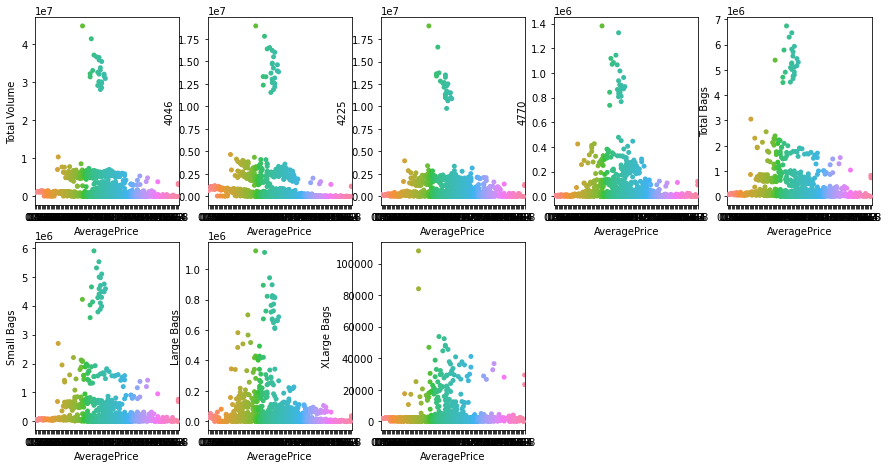

In [117]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<=8 :  # as there are 8 columns in the data
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# Check multicollinearity problem.Find if one feature is dependent on another feathure.

In [118]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

This is how our data looks now after scaling.Great,now we will check for multicollinearity usin VIF(variance inflation factor)

In [119]:
x_scaled.shape

(1517, 8)

In [120]:
#Finding variance inflation factor in each scaled column i.e. x_scaled.shape[1] (1/1-R2)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

#let's check the values
vif

,vif,features
0,inf,Total Volume
1,inf,4046
2,inf,4225
3,inf,4770
4,inf,Total Bags
5,4.036511e+05,Small Bags
6,1.344692e+04,Large Bags
7,4.969537e+01,XLarge Bags


This is multicollinearity problem.

# KNN

In [125]:
from sklearn.linear_model import LinearRegression

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
# Print summary
print('shape    ------>',df_1.shape)
print('Each column and data type and its count','\n')
print(df_1.info())

shape    ------> (1517, 9)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
dtypes: float64(9)
memory usage: 150.8 KB
None


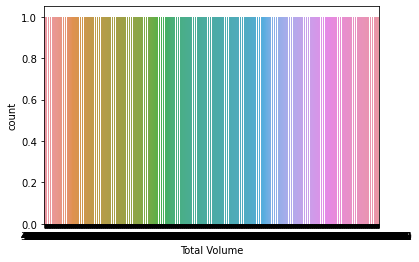

In [132]:
# plot each class frequency
sns.countplot(x='Total Volume',data=df_1)
plt.show()


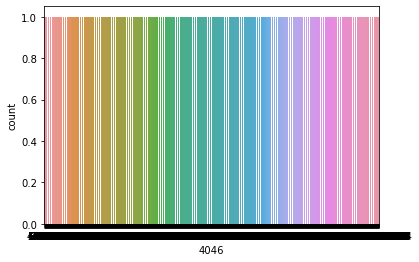

In [133]:
sns.countplot(x='4046',data=df_1)
plt.show()

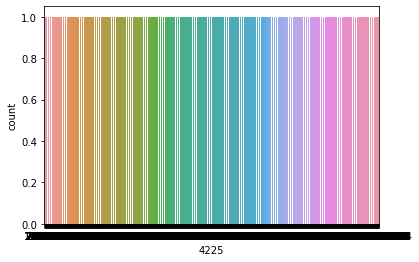

In [134]:
sns.countplot(x='4225',data=df_1)
plt.show()

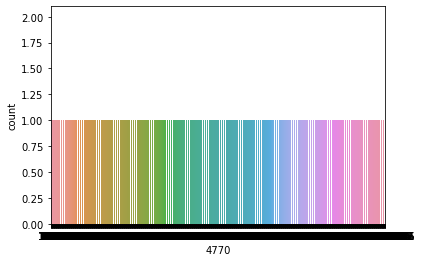

In [135]:
sns.countplot(x='4770',data=df_1)
plt.show()

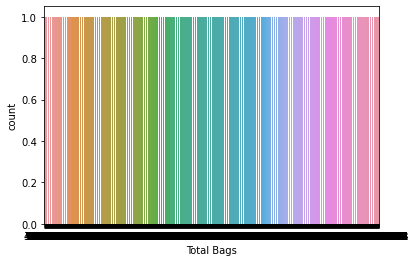

In [136]:
sns.countplot(x='Total Bags',data=df_1)
plt.show()

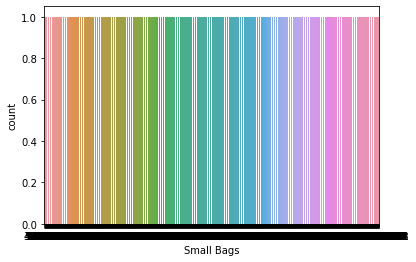

In [137]:
sns.countplot(x='Small Bags',data=df_1)
plt.show()

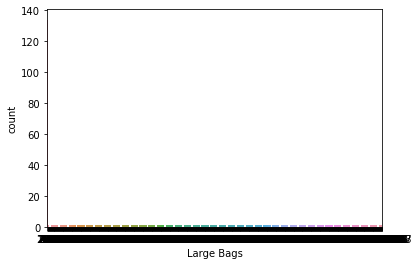

In [138]:
sns.countplot(x='Large Bags',data=df_1)
plt.show()

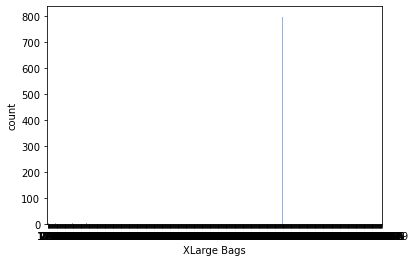

In [139]:
sns.countplot(x='XLarge Bags',data=df_1)
plt.show()

# Using selectKBest feature selection method

selectkBest use f_classif function to find best features,where f_classif uses ANOVA test.

In [140]:
from sklearn.feature_selection import SelectKBest,f_classif

In [141]:
x=df_1.drop('AveragePrice',axis=1)
y=df_1.AveragePrice

In [143]:
best_features = SelectKBest(score_func=f_classif,k=5)
fit = best_features.fit(x,y)
df_1scores=pd.DataFrame(fit.scores_)
df_1columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores =pd.concat([df_1columns,df_1scores],axis=1)
feature_scores.columns = ['feature_Name','score']  # name output columns
print(feature_scores.nlargest(5,'score')) # print 8 best features

   feature_Name     score
6    Large Bags  1.709407
1          4046  1.428515
7   XLarge Bags  1.306024
0  Total Volume  1.222617
3          4770  1.221129


# Model Building

In [144]:
new_x = df[['Large Bags','4046','XLarge Bags','Total Volume','4770']]

In [145]:
new_x

,Large Bags,4046,XLarge Bags,Total Volume,4770
0,93.25,1036.74,0.00,64236.62,48.16
1,97.49,674.28,0.00,54876.98,58.33
2,103.14,794.70,0.00,118220.22,130.50
3,133.76,1132.00,0.00,78992.15,72.58
4,197.69,941.48,0.00,51039.60,75.78
...,...,...,...,...,...
1512,10354.65,57529.11,240.28,190846.01,17531.78
1513,8596.56,43325.87,0.00,178235.75,19419.57
1514,8258.16,46364.75,825.00,178410.82,16736.92
1515,8278.26,54110.79,0.00,189131.52,17495.42


In [146]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

In [147]:
# Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size=0.25,random_state=355)

In [ ]:
# Write one function  and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n==================Train Result==================")
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
    elif train==False:
              pred=clf.predict(x_test)
              
              
              print("\n==================Train Result==================")
              print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
              print('\n \n Test clssaification Report \n',classification_report(y_test,pred,digits=2)) ## Model confidence/accuracy

# Cross validation

In [150]:
from sklearn.model_selection import KFold,cross_val_score

In [152]:
cross_val_score(knn,x_scalar,y,cv=)

array([nan, nan, nan, nan, nan])

In [153]:
cross_val_score(KNeighborsClassifier(),x_scalar,y,cv=3).mean()

nan

# For Region

In [308]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
df_2=data.dropna(how='all')


In [310]:
df_3=df_2.drop(columns=['Unnamed: 0','Date','year','type'],axis=1)

In [311]:
df_3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,Albany
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,Charlotte


In [312]:
df_3.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


ValueError: could not convert string to float: 'Albany'

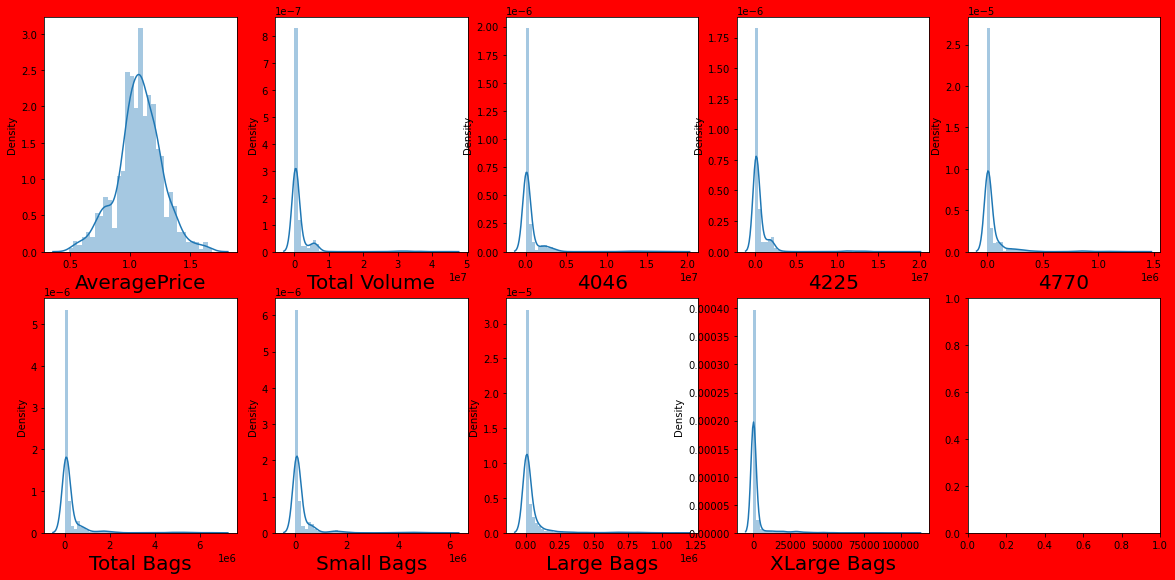

In [313]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in df_3:
    if plotnumber<=10 :  # as there are 17 columns in the data
        ax= plt.subplot(5,5,plotnumber)
        sns.distplot(df_3[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()





In [315]:
# Divide data set into features and label
y=df_3['region']
x=df_3.drop(columns=['region'])

In [316]:
y

0          Albany
1          Albany
2          Albany
3          Albany
4          Albany
          ...    
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, Length: 1517, dtype: object

In [317]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


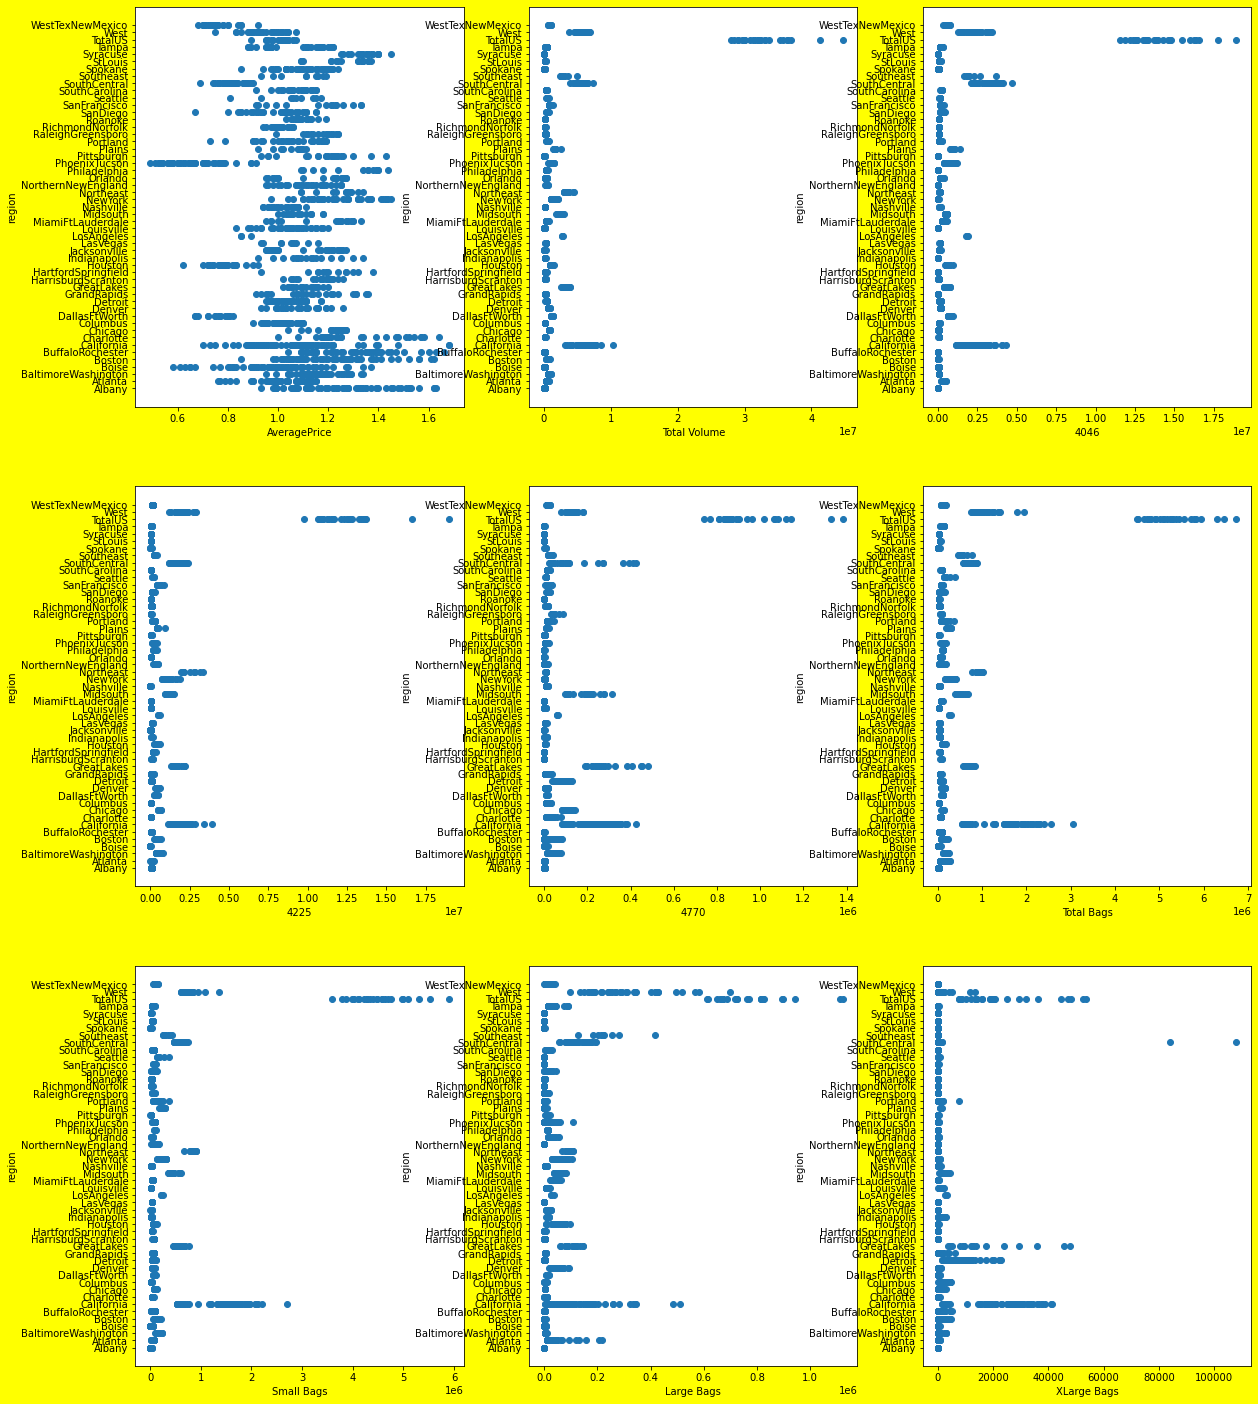

In [318]:
# Visualizing relationship
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1


for column in df_3:
    if plotnumber<=9 :  # as there are 9 columns in the data
        ax= plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('region',fontsize=10)
        
    plotnumber+=1
plt.show()

In [319]:
# Data scaling.formula Z=(x-mean)/std
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [320]:
x_scaled

array([[ 1.35048079, -0.34696593, -0.33149016, ..., -0.37105465,
        -0.36004386, -0.29272731],
       [ 1.45639674, -0.34907791, -0.33167633, ..., -0.3698118 ,
        -0.36000798, -0.29272731],
       [-0.76783831, -0.33478463, -0.33161448, ..., -0.37192201,
        -0.35996017, -0.29272731],
       ...,
       [ 2.14485045, -0.32120275, -0.30820887, ..., -0.30194984,
        -0.29095317, -0.1820374 ],
       [ 2.09189247, -0.31878364, -0.30423037, ..., -0.29836419,
        -0.29078309, -0.29272731],
       [ 1.88006056, -0.3201721 , -0.30987728, ..., -0.29557902,
        -0.26226571, -0.29272731]])

In [321]:
# split data into train and test. Model will be build on training data tested on test data.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

774         PhoenixTucson
657               NewYork
1015        SouthCarolina
1111              Spokane
883     RaleighGreensboro
Name: region, dtype: object

In [322]:
df_features=data.drop('region',axis=1)

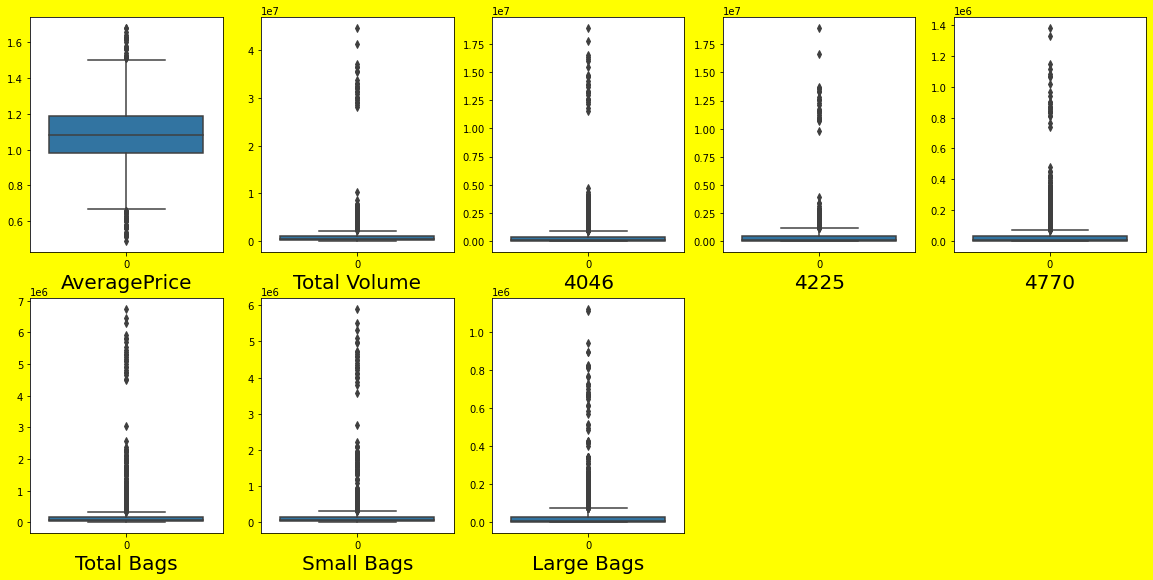

In [323]:
#Visualize the outliers using box plot
plt.figure(figsize=(20,25),facecolor='yellow')
graph = 1


for column in df_3:
    if graph<=8 :  # as there are 8 columns in the data
        plt.subplot(5,5,graph)
        ax = sns.boxplot(data=df_3[column])
        plt.xlabel(column,fontsize=20)
        
        
    graph+=1
plt.show()

It seems that there is skewness in each columns.

In [324]:
df_3.shape

(1517, 10)

# Finding relationship.Wde want to keep only those features which have relationship with label.

In [325]:
x=data.drop(columns=['region'])
y=data['region']

Before we fit our data to a model. Let's visualize the relationship between our independent variables and categories.

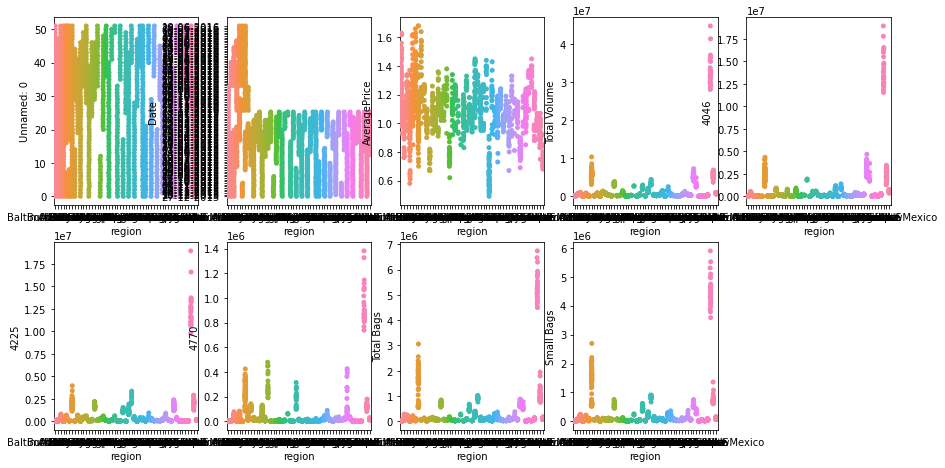

In [326]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<=9 :  # as there are 9 columns in the data
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()